In [8]:
import cartopy.crs as ccrs
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

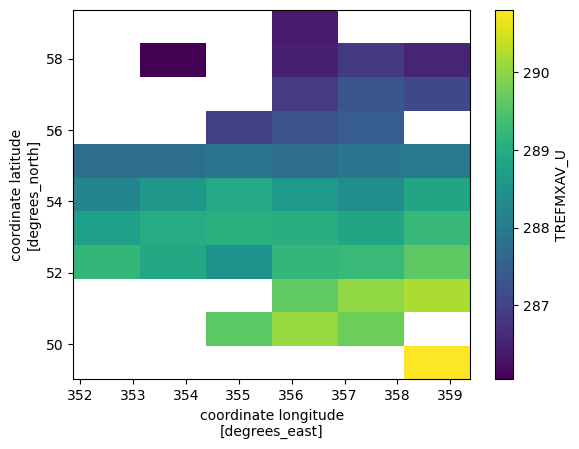

In [4]:
ds008 = xr.open_dataset("008_2006_2080_352_360.nc")
ds008["TREFMXAV_U"].mean(dim=["time"]).plot()

In [16]:
ds008["TREFMXAV_U"].min()
# ds008["TREFMXAV_U"].max()

<xarray.DataArray 'TREFMXAV_U' ()> Size: 8B
array(270.38442993)

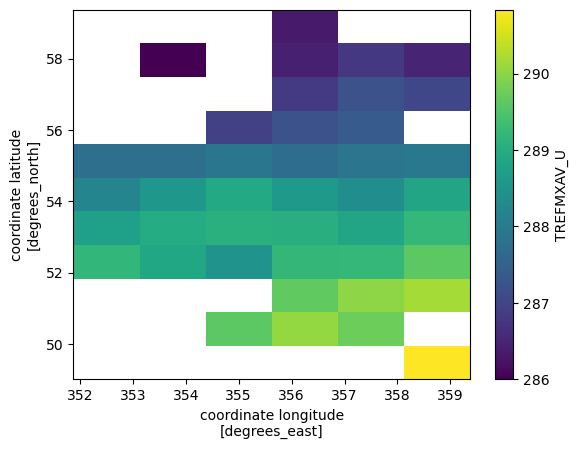

In [6]:
ds007 = xr.open_dataset("007_2006_2080_352_360.nc")
ds007["TREFMXAV_U"].mean(dim=["time"]).plot()

In [7]:
ds007

<xarray.Dataset> Size: 65MB
Dimensions:     (time: 27374, lat: 11, lon: 6)
Coordinates:
  * lat         (lat) float32 44B 49.48 50.42 51.36 52.3 ... 57.02 57.96 58.9
  * lon         (lon) float32 24B 352.5 353.8 355.0 356.2 357.5 358.8
  * time        (time) object 219kB 2006-01-02 00:00:00 ... 2080-12-31 00:00:00
Data variables:
    TREFMXAV_U  (time, lat, lon) float32 7MB nan nan nan nan ... 282.2 nan nan
    FLNS        (time, lat, lon) float32 7MB ...
    FSNS        (time, lat, lon) float32 7MB ...
    PRECT       (time, lat, lon) float32 7MB ...
    PRSN        (time, lat, lon) float32 7MB ...
    QBOT        (time, lat, lon) float32 7MB ...
    TREFHT      (time, lat, lon) float32 7MB ...
    UBOT        (time, lat, lon) float32 7MB ...
    VBOT        (time, lat, lon) float32 7MB ...

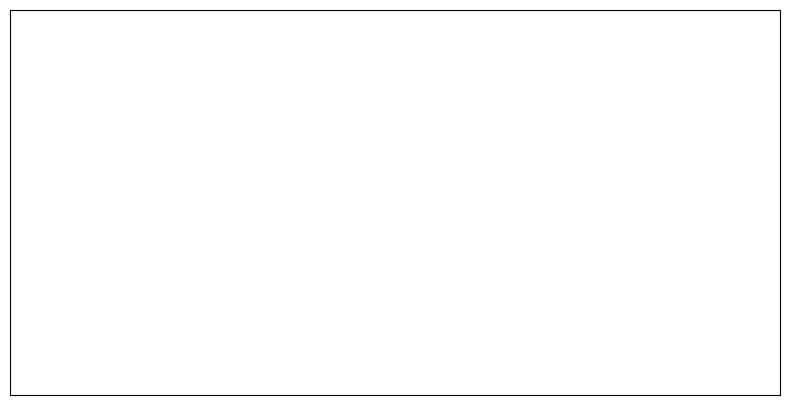

In [9]:
# create map
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

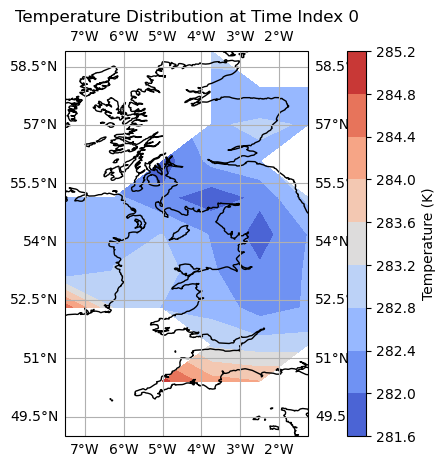

In [13]:
# 选取某个时间点的数据
time_index = 0  # 选择第一个时间点
temp_data = ds007["TREFMXAV_U"].isel(time=time_index)

# 创建地图
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())  # 选择投影方式（PlateCarree: 直接经纬度映射）

# 绘制等值线图
contour = ax.contourf(ds007["lon"], ds007["lat"], temp_data, cmap="coolwarm")

# 添加地理信息
ax.coastlines()  # 添加海岸线
ax.gridlines(draw_labels=True)  # 添加网格线

# 添加颜色条
plt.colorbar(contour, label="Temperature (K)")  

# 标题
plt.title(f"Temperature Distribution at Time Index {time_index}")
plt.show()

Temperature Ranges (°C):
003_2006_2080_352_360.nc: 8.27 ~ 11.29
004_2006_2080_352_360.nc: 8.00 ~ 13.23
005_2006_2080_352_360.nc: 5.57 ~ 13.39
006_2006_2080_352_360.nc: 6.95 ~ 12.42
007_2006_2080_352_360.nc: 8.62 ~ 11.76
008_2006_2080_352_360.nc: 3.72 ~ 13.31

Global Range: 3.72°C to 13.39°C


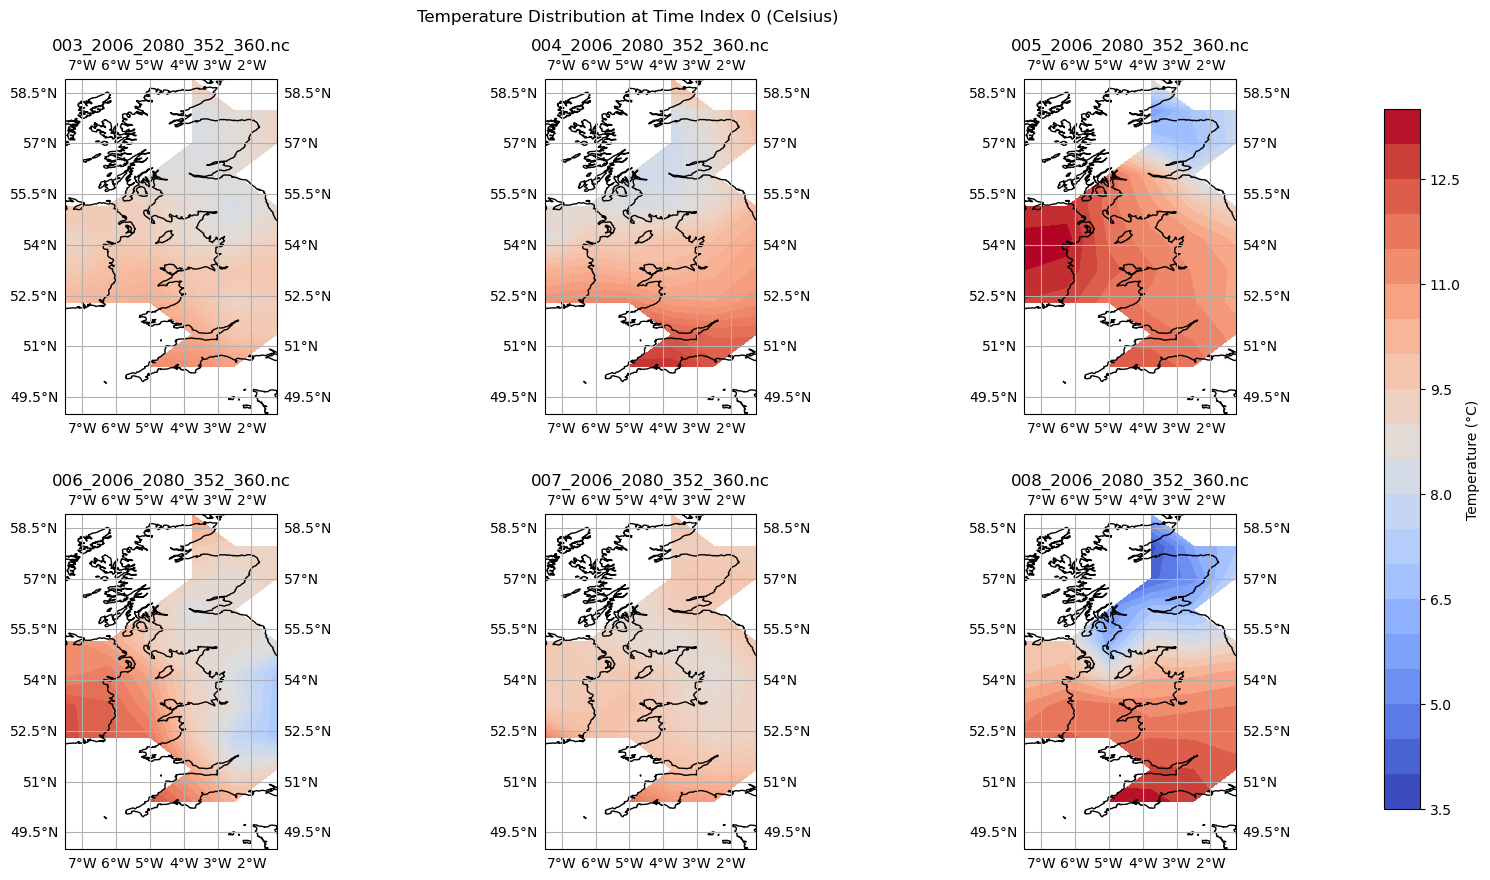

In [9]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.colors import Normalize

# Configuration parameters
files = [f"{i:03d}_2006_2080_352_360.nc" for i in range(3,9)]
time_index = 0  # Selected time index
KELVIN_OFFSET = 273.15  # Conversion constant

# Calculate global temperature range in Celsius
all_mins = []
all_maxs = []
for file in files:
    ds = xr.open_dataset(file)
    celsius_data = ds["TREFMXAV_U"].isel(time=time_index) - KELVIN_OFFSET
    all_mins.append(celsius_data.min().values)
    all_maxs.append(celsius_data.max().values)

vmin = min(all_mins)
vmax = max(all_maxs)

# Print validation information
print("Temperature Ranges (°C):")
for file, mn, mx in zip(files, all_mins, all_maxs):
    print(f"{file}: {mn:.2f} ~ {mx:.2f}")
print(f"\nGlobal Range: {vmin:.2f}°C to {vmax:.2f}°C")

# Create normalization object
norm = Normalize(vmin=vmin, vmax=vmax)

# Initialize figure
fig, axs = plt.subplots(2, 3, figsize=(18, 10),
                       subplot_kw={'projection': ccrs.PlateCarree()})
fig.subplots_adjust(right=0.9, wspace=0.1, hspace=0.3)

# Plot each dataset
for i, file in enumerate(files):
    # Calculate subplot position
    row = i // 3
    col = i % 3
    
    # Load and convert data
    ds = xr.open_dataset(file)
    celsius_data = ds["TREFMXAV_U"].isel(time=time_index) - KELVIN_OFFSET
    
    # Create contour plot
    contour = axs[row, col].contourf(
        ds.lon, ds.lat, celsius_data,
        cmap="coolwarm",
        norm=norm,
        levels=20
    )
    
    # Add geographic features
    axs[row, col].coastlines()
    axs[row, col].gridlines(draw_labels=True)
    axs[row, col].set_title(f"{file}")

# Add unified colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(contour, cax=cbar_ax, label="Temperature (°C)")

# Configure main title
plt.suptitle(f"Temperature Distribution at Time Index {time_index} (Celsius)", y=0.95)
plt.show()

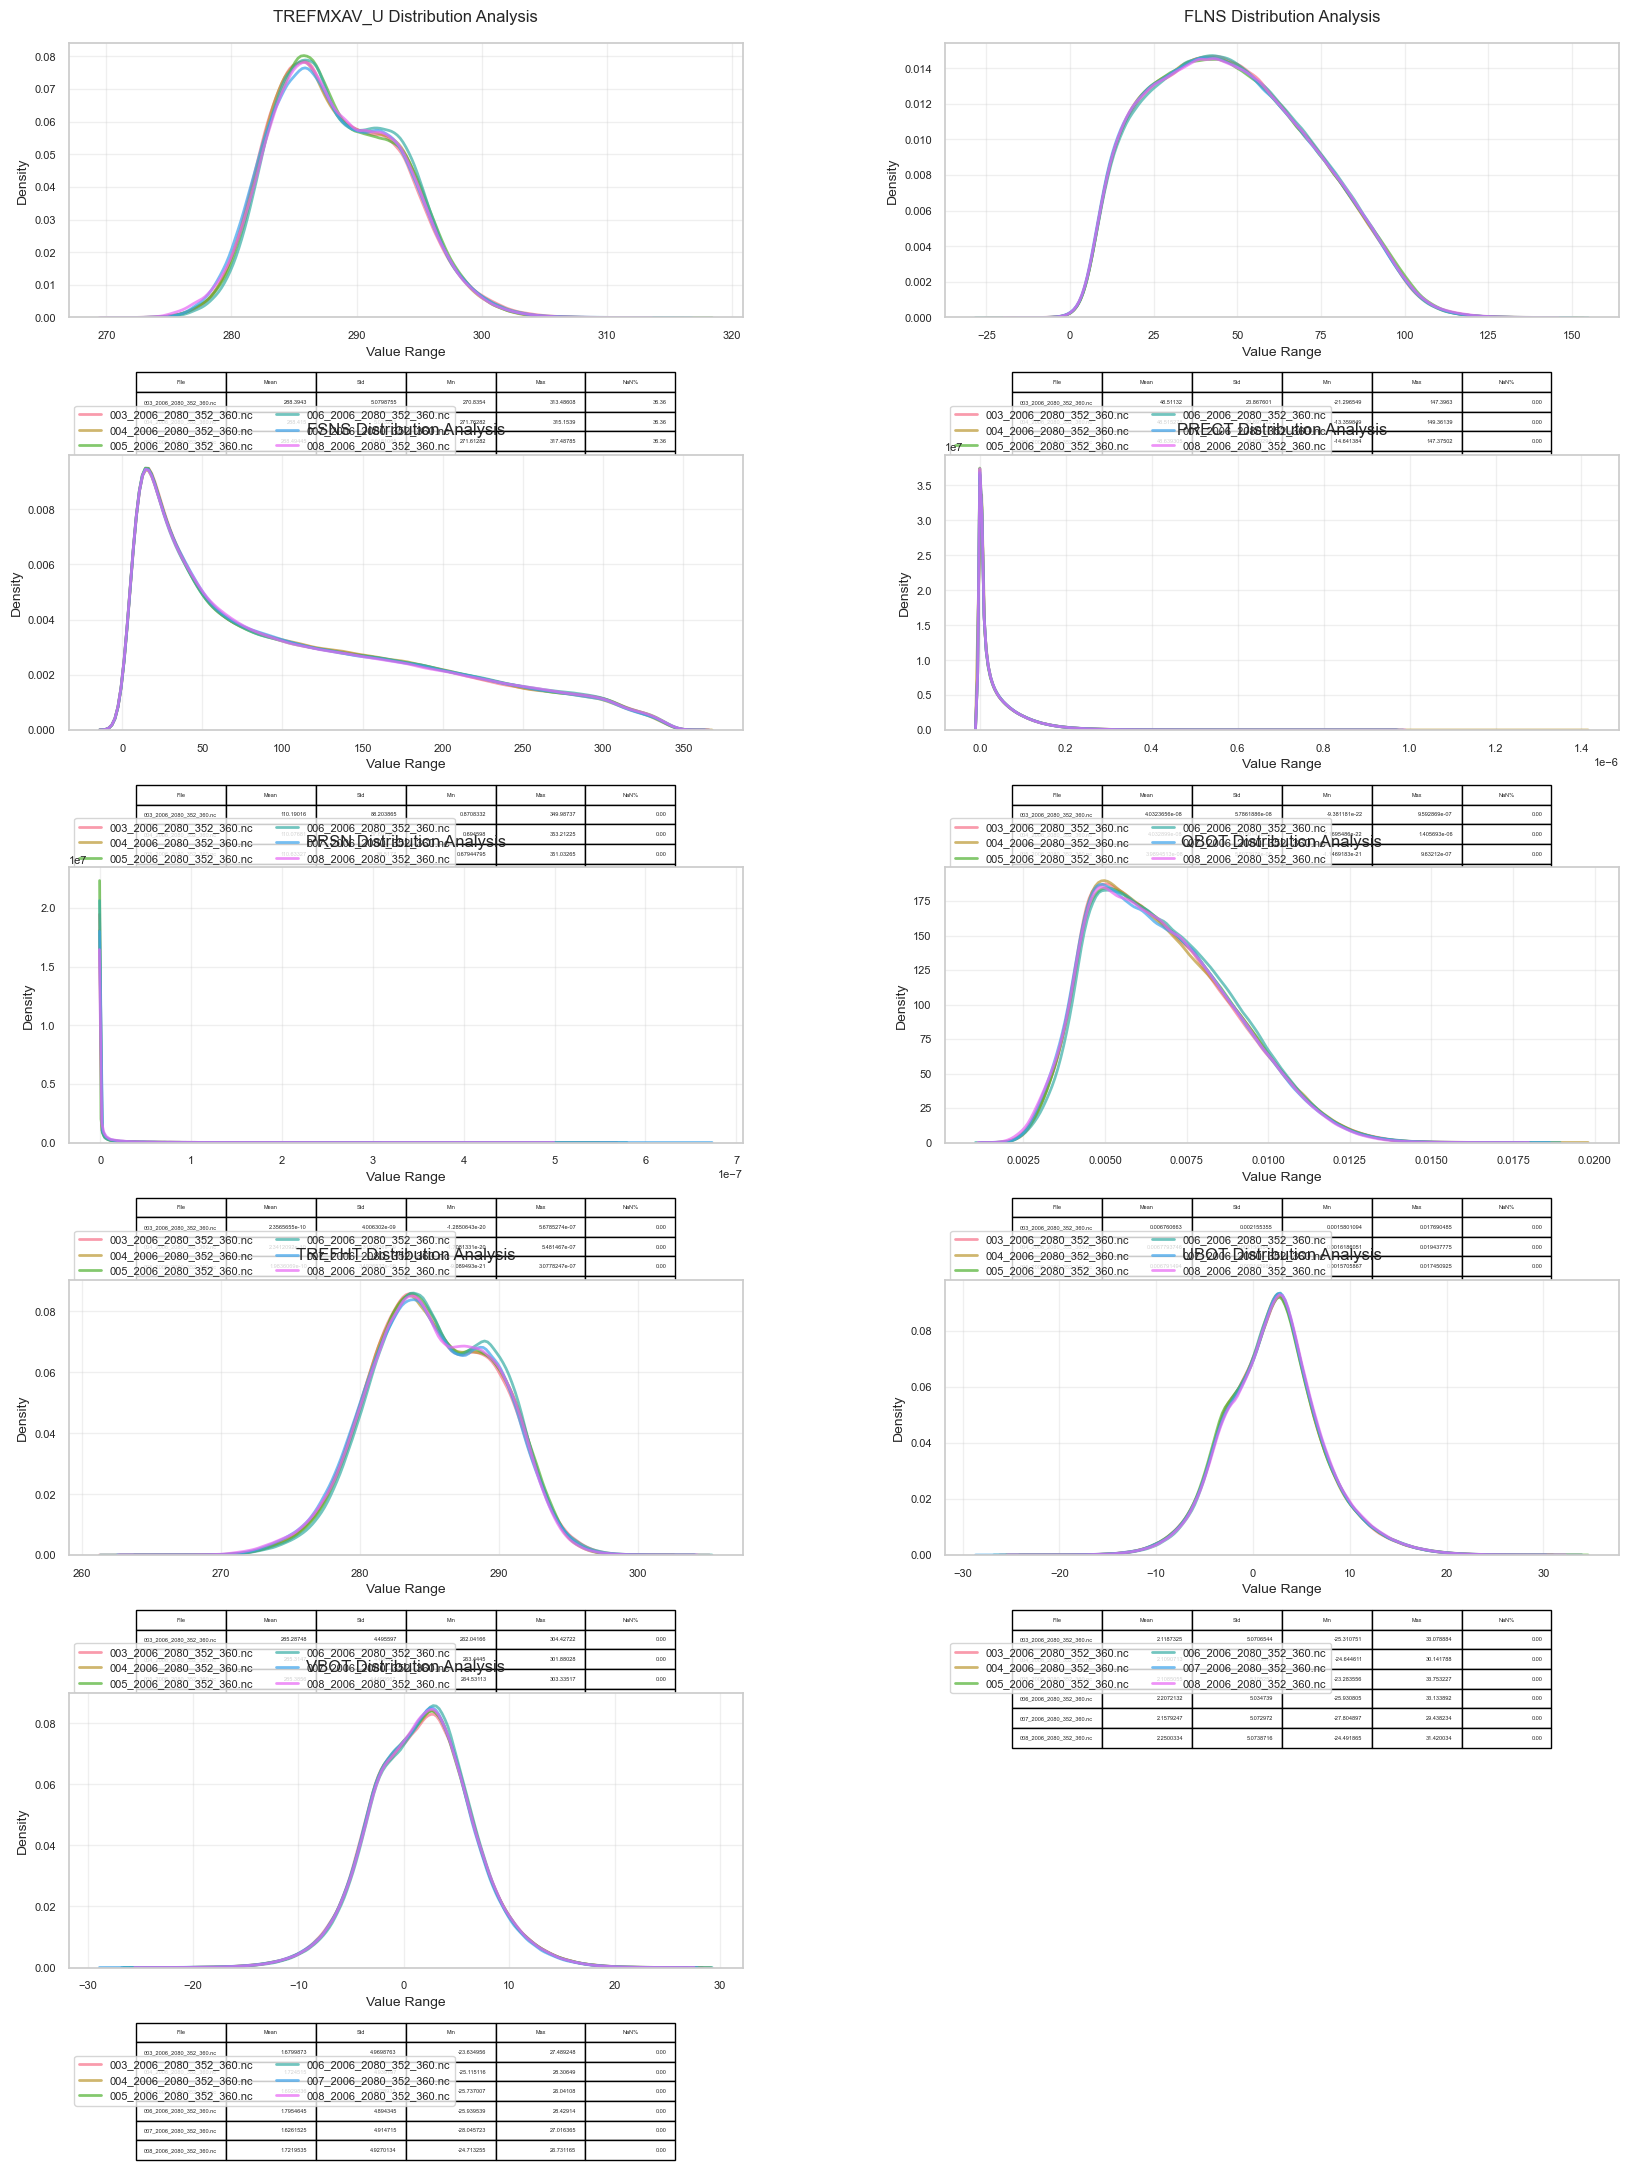

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration parameters
files = [f"{i:03d}_2006_2080_352_360.nc" for i in range(3,9)]
variables = ['TREFMXAV_U', 'FLNS', 'FSNS', 'PRECT', 'PRSN', 'QBOT', 'TREFHT', 'UBOT', 'VBOT']

# Create global plotting settings (adjusted version)
sns.set_theme(style="whitegrid", palette="husl")  # Using seaborn theme
plt.rcParams.update({
    'figure.figsize': (20, 25),
    'font.size': 10,
    'axes.titlesize': 12,
    'axes.labelsize': 10,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8
})

fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Analyze by feature dimension
for var_idx, var in enumerate(variables):
    ax = fig.add_subplot(5, 2, var_idx+1)
    
    # Initialize statistics storage
    all_stats = []
    
    # Iterate through all files
    for file_idx, file in enumerate(files):
        # Load data
        ds = xr.open_dataset(file)
        data = ds[var].values.flatten()
        
        # Calculate basic statistics (ignoring NaNs)
        stats = {
            'File': file,
            'Mean': np.nanmean(data),
            'Std': np.nanstd(data),
            'Min': np.nanmin(data),
            'Max': np.nanmax(data),
            'NaN%': np.isnan(data).sum()/len(data)*100
        }
        all_stats.append(stats)
        
        # Plot distribution curves
        sns.kdeplot(data, ax=ax, label=f'{file}', 
                   linewidth=2, alpha=0.7)
    
    # Configure plot
    ax.set_title(f'{var} Distribution Analysis', pad=15)
    ax.set_xlabel('Value Range')
    ax.set_ylabel('Density')
    ax.grid(alpha=0.3)
    ax.legend(loc='upper left', bbox_to_anchor=(0, -0.3), 
             ncol=2, fontsize=8)
    
    # Add statistics table
    columns = ['File', 'Mean', 'Std', 'Min', 'Max', 'NaN%']
    cell_text = [[f"{s[col]:.2f}" if isinstance(s[col], float) else s[col] 
                for col in columns] for s in all_stats]
    
    table = plt.table(cellText=cell_text,
                     colLabels=columns,
                     colWidths=[0.15]*len(columns),
                     loc='bottom',
                     bbox=[0.1, -0.7, 0.8, 0.5])

plt.show()